    Analysis of ICE Removals from New York-Based Ports, September 2023 to July 2025

    This notebook runs two analyses of Immigration and Custom's Enforcement (ICE) data on removals nationally and from NY-based ports.  

In [1]:
import pandas as pd
!pip install openpyxl
import matplotlib.pyplot as plt

    In this section we open up relevant Excel sheets of raw data. 

In [2]:
ERO_removals = pd.read_excel ("../data/removals-latest.xlsx")
ERO_removals["departed_date"].astype("datetime64[ns]")

0        2024-07-04
1        2023-09-09
2        2023-09-09
3        2024-06-25
4        2025-04-02
            ...    
528436   2025-07-23
528437   2025-07-23
528438   2025-07-23
528439   2025-07-23
528440   2025-07-28
Name: departed_date, Length: 528441, dtype: datetime64[ns]

    This section gathers more information about the uploaded data set from the Deportation Data Project, including:

        - the kinds of data for each column.
        - the number of rows in the ERO_removals dataframe.
        - a display of the dataset's columns. 

In [3]:
ERO_removals.dtypes

departed_date                         datetime64[ns]
port_of_departure                             object
departure_country                             object
docket_aor                                    object
apprehension_state                            object
apprehension_county                           object
case_status                                   object
gender                                        object
birth_country                                 object
citizenship_country                           object
birth_year                                   float64
entry_date                                    object
entry_status                                  object
msc_ncic_charge                               object
msc_ncic_charge_code                          object
msc_charge_date                       datetime64[ns]
msc_criminal_charge_status                    object
msc_criminal_charge_status_code               object
msc_conviction_date                   datetime

In [4]:
print(len(ERO_removals))

528441


In [5]:
ERO_removals.head()

,departed_date,port_of_departure,departure_country,docket_aor,apprehension_state,apprehension_county,case_status,gender,birth_country,citizenship_country,...,final_order_date,final_charge_code,final_charge_section_code,prior_deport_yes_no,latest_person_departed_date,unique_identifier,duplicate_likely,file_original,sheet_original,row_original
0,2024-07-04,"NOGALES, AZ, POE",MEXICO,Phoenix Area of Responsibility,NaN,NaN,6-Deported/Removed - Deportability,Male,MEXICO,MEXICO,...,2024-06-06,I9C2,212a9CiII,YES,2024-07-04,000031423837d9b430050e9298882932f74ee3dd,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,8
1,2023-09-09,"CALEXICO, CA, POE",MEXICO,San Diego Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,MEXICO,MEXICO,...,2023-09-09,I9C2,212a9CiII,YES,2023-09-09,00006f56f3c8f39d692c569970f65876830d5716,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,9
2,2023-09-09,"NOGALES, AZ, POE",MEXICO,Phoenix Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Female,MEXICO,MEXICO,...,2023-08-23,I9C2,212a9CiII,YES,2023-09-09,00007be9691d4682465db5bd1a5a0cca4af9019c,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,10
3,2024-06-25,"HARLINGEN, TX, POE",COLOMBIA,Harlingen Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,COLOMBIA,COLOMBIA,...,2024-06-14,I7A1,212a7AiI,NO,2024-06-25,0000cecbf0050979574b60e7d2f2fefdb2c8eb6c,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,11
4,2025-04-02,"NOGALES, AZ, POE",MEXICO,Seattle Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,MEXICO,MEXICO,...,2025-03-25,I2A1,212a2AiI,NO,2025-04-02,0000ed58c34ee6f941918de40d86cb66759ad833,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,12


    In this section, the dataframe, ERO_removals, is having its index reset to "departed_date") in order to:

        - allow for the resampling function to count the number removals by month. 
        - plot the number of removals overtime by month. 
        

In [6]:
removals_over_time = ERO_removals.set_index("departed_date")
removals_over_time.head()

,port_of_departure,departure_country,docket_aor,apprehension_state,apprehension_county,case_status,gender,birth_country,citizenship_country,birth_year,...,final_order_date,final_charge_code,final_charge_section_code,prior_deport_yes_no,latest_person_departed_date,unique_identifier,duplicate_likely,file_original,sheet_original,row_original
departed_date,,,,,,,,,,,,,,,,,,,,,
2024-07-04,"NOGALES, AZ, POE",MEXICO,Phoenix Area of Responsibility,NaN,NaN,6-Deported/Removed - Deportability,Male,MEXICO,MEXICO,1991.0,...,2024-06-06,I9C2,212a9CiII,YES,2024-07-04,000031423837d9b430050e9298882932f74ee3dd,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,8
2023-09-09,"CALEXICO, CA, POE",MEXICO,San Diego Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,MEXICO,MEXICO,1995.0,...,2023-09-09,I9C2,212a9CiII,YES,2023-09-09,00006f56f3c8f39d692c569970f65876830d5716,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,9
2023-09-09,"NOGALES, AZ, POE",MEXICO,Phoenix Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Female,MEXICO,MEXICO,1993.0,...,2023-08-23,I9C2,212a9CiII,YES,2023-09-09,00007be9691d4682465db5bd1a5a0cca4af9019c,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,10
2024-06-25,"HARLINGEN, TX, POE",COLOMBIA,Harlingen Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,COLOMBIA,COLOMBIA,2000.0,...,2024-06-14,I7A1,212a7AiI,NO,2024-06-25,0000cecbf0050979574b60e7d2f2fefdb2c8eb6c,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,11
2025-04-02,"NOGALES, AZ, POE",MEXICO,Seattle Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,MEXICO,MEXICO,1980.0,...,2025-03-25,I2A1,212a2AiI,NO,2025-04-02,0000ed58c34ee6f941918de40d86cb66759ad833,0.0,2025-ICLI-00019_2024-ICFO-39357_ICE Removals_L...,Removals,12


In [7]:
removals_monthly_tally = removals_over_time.resample('M')["unique_identifier"].count()
removals_monthly_tally

/var/folders/t5/r7v_hk_s3fbblknzpgjrfjzr0000gn/T/ipykernel_35510/325554082.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  removals_monthly_tally = removals_over_time.resample('M')["unique_identifier"].count()


departed_date
2023-09-30    19673
2023-10-31    20038
2023-11-30    22388
2023-12-31    21029
2024-01-31    22404
2024-02-29    22735
2024-03-31    23740
2024-04-30    23414
2024-05-31    25702
2024-06-30    24746
2024-07-31    26994
2024-08-31    25592
2024-09-30    22924
2024-10-31    24919
2024-11-30    22090
2024-12-31    21593
2025-01-31    19686
2025-02-28    18957
2025-03-31    20638
2025-04-30    20589
2025-05-31    26517
2025-06-30    27830
2025-07-31    23148
Freq: ME, Name: unique_identifier, dtype: int64

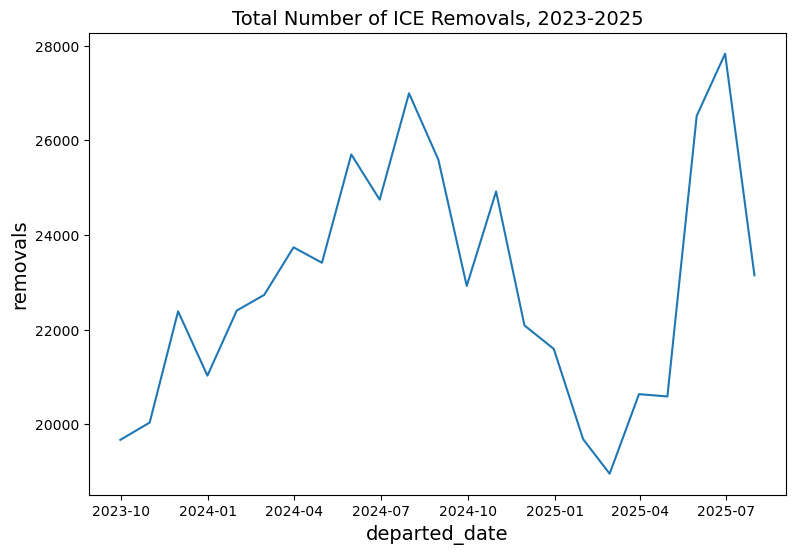

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(removals_monthly_tally)
ax.set_xlabel("departed_date", fontsize=14)
ax.set_ylabel("removals", fontsize=14)
ax.set_title('Total Number of ICE Removals, 2023-2025', fontsize=14)
plt.savefig('../output/removals_monthly_chart.png')

    Here begins the second data analysis. In this section, the removals_over_time_NY dataframe, is considering how whether or not "NY" or "NYC" is in the "port_of_departure" column. If the column does indicate "NY" or "NYC" it will be listed as "True." This will be produce a boolean dataset. 

In [9]:
removals_over_time_NY = removals_over_time["port_of_departure"].str.contains("NY" or "NYC")
removals_over_time_NY.head()

departed_date
2024-07-04    False
2023-09-09    False
2023-09-09    False
2024-06-25    False
2025-04-02    False
Name: port_of_departure, dtype: bool

    In this section two seperate dataframes, one that contains departure dates were removals occured from a NY-based port, and another dataframe where removals did not occur from a NY-based port.  
        

In [10]:
removals_NY_true = removals_over_time_NY[removals_over_time_NY == True]
removals_NY_false = removals_over_time_NY[removals_over_time_NY == False]

    Using the len function, each dataframe's rows were counted to find the total and confirm all removals from the original "ERO_removals" dataset were accounted for. 

In [11]:
print(len(removals_NY_true))

8710


In [12]:
print(len(removals_NY_false))

519731


    Here the total number of removals from NY-based ports were tallied by month to:
    
    - find which dates had the least and most removals from NY-based ports. 
    - illustrate in a line graph the removals from NY-based ports overtime. 

In [13]:
removals_NY_true_tally = removals_NY_true.resample('M').count()
removals_NY_true_tally

/var/folders/t5/r7v_hk_s3fbblknzpgjrfjzr0000gn/T/ipykernel_35510/65337380.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  removals_NY_true_tally = removals_NY_true.resample('M').count()


departed_date
2023-09-30    173
2023-10-31    267
2023-11-30    212
2023-12-31    235
2024-01-31    275
2024-02-29    276
2024-03-31    309
2024-04-30    284
2024-05-31    305
2024-06-30    298
2024-07-31    304
2024-08-31    344
2024-09-30    437
2024-10-31    477
2024-11-30    358
2024-12-31    375
2025-01-31    546
2025-02-28    509
2025-03-31    635
2025-04-30    727
2025-05-31    549
2025-06-30    385
2025-07-31    430
Freq: ME, Name: port_of_departure, dtype: int64

In [14]:
removals_NY_true_tally.describe()

count     23.000000
mean     378.695652
std      140.491163
min      173.000000
25%      280.000000
50%      344.000000
75%      457.000000
max      727.000000
Name: port_of_departure, dtype: float64

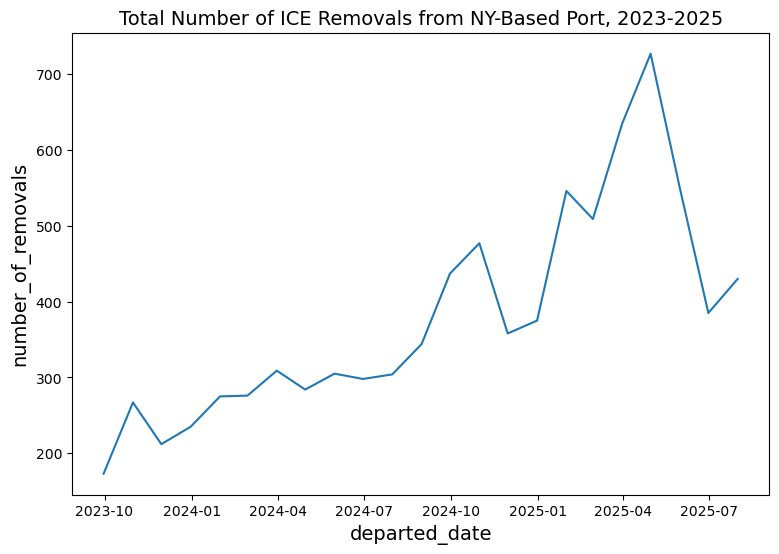

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(removals_NY_true_tally)
ax.set_xlabel("departed_date", fontsize=14)
ax.set_ylabel("number_of_removals", fontsize=14)
ax.set_title('Total Number of ICE Removals from NY-Based Port, 2023-2025', fontsize=14)
plt.savefig('../output/removals_ny_monthly_chart.png')